In [1]:
# Importing the basic libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pdb
import os
plt.style.use('ggplot')

In [2]:
train_data = pd.read_csv('churn_training.txt', sep='\t')
test_data = pd.read_csv('churn_test.txt', sep='\t')

In [3]:
# checking the training and testing data.
print(train_data.shape)
print(test_data.shape)

(2000, 21)
(1033, 21)


In [4]:
# 去除没有用处的特征
train_data.drop('area_code', axis=1, inplace=True)
test_data.drop('area_code', axis=1, inplace=True)
train_data.drop('phone_number', axis=1, inplace=True)
test_data.drop('phone_number', axis=1, inplace=True)
train_data.drop('state', axis=1, inplace=True)
test_data.drop('state', axis=1, inplace=True)

In [5]:
# checking the training and testing data.
print(train_data.shape)
print(test_data.shape)

(2000, 18)
(1033, 18)


In [6]:
def zscore(df):
    out = []
    m = np.mean(df)
    sd = np.std(df)
    for i in enumerate(df):
        n = i[0]
        i = i[1]
        z = (i-m) / sd
        if np.abs(z) > 3:
            out.append(n)
#             print(i)
#     print("Outliers:", out)
    return len(out), out

In [7]:
numeric_cols = list(train_data.select_dtypes(exclude='object').columns)
print(len(numeric_cols))

numeric_cols = numeric_cols[:-1]
print(numeric_cols)
print(len(numeric_cols))


18
['account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
17


In [8]:
num_dele, dele = 0, []
for i in numeric_cols:
    i = str(i)
    t1,t2 = zscore(train_data[i])
    num_dele += t1
    dele.extend(t2)

dele = list(set(dele))
print(len(dele), dele)

99 [514, 517, 12, 529, 1554, 1043, 532, 542, 1575, 1596, 572, 574, 590, 593, 1626, 100, 613, 1126, 102, 105, 1643, 1645, 1655, 1143, 1148, 641, 1172, 666, 1185, 1188, 1702, 679, 680, 169, 1192, 188, 191, 197, 1745, 1752, 217, 1762, 1763, 1766, 1771, 751, 1777, 243, 758, 1806, 784, 275, 790, 279, 283, 795, 802, 1826, 293, 1835, 302, 1326, 1842, 307, 836, 1862, 1865, 844, 336, 1365, 358, 362, 366, 1397, 888, 1401, 1404, 1925, 399, 1936, 1426, 919, 410, 1438, 928, 416, 930, 1966, 1976, 1977, 443, 1470, 453, 970, 480, 490, 499, 1529, 508]


In [9]:
train_y, test_y = train_data['class'], test_data['class']
train_x, test_x = train_data.drop(columns='class', axis=1), test_data.drop(columns='class', axis=1)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=100, gamma=0.001)
clf.fit(train_x, train_y)
prediction = clf.predict(test_x)

In [25]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix #for confusion matrix

def Result(prediction, test_y):
    print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction, test_y))
    print('The f1_score of the Decision Tree is',metrics.f1_score(prediction, test_y))
    print('The precision_score of the Decision Tree is',metrics.precision_score(prediction, test_y))
    print('The recall_score of the Decision Tree is',metrics.recall_score(prediction, test_y))
    print('The roc_auc_score of the Decision Tree is',metrics.roc_auc_score(prediction, test_y))
    print(confusion_matrix(test_y, prediction))

In [26]:
Result(prediction, test_y)

The accuracy of the Decision Tree is 0.9506292352371732
The f1_score of the Decision Tree is 0.2388059701492537
The precision_score of the Decision Tree is 0.18604651162790697
The recall_score of the Decision Tree is 0.3333333333333333
The roc_auc_score of the Decision Tree is 0.6493227618103733
[[974  16]
 [ 35   8]]


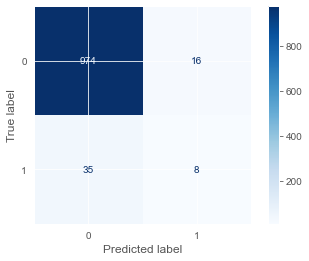

In [27]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf, test_x, test_y, cmap="Blues")
plt.savefig('./Image/svm_cm.jpg', dpi=200)
plt.show()